PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question- https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [82]:
import torch
from torch import nn ## has all bulding block for nueral network
import matplotlib.pyplot as plt

# Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text
Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.|

In [83]:
#parameters
wight=0.7
bias=0.3
#create tensor
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)

Y=wight*X+bias

print(X[:10],Y[:10])
print(len(X),len(Y))



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


### Createing the training set and test set for our data set

In [84]:
#should but spliting ritoe about 80%:20%
traing_split=int(0.8*len(X))
x_train,y_train=X[:traing_split],Y[:traing_split]
x_test,y_test=X[traing_split:],Y[traing_split:]
len(x_train),len(x_test) ,len(y_train),len(y_test)

(40, 10, 40, 10)

In [85]:
def plot_predictions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
    """
    Plot training data and test data along with predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

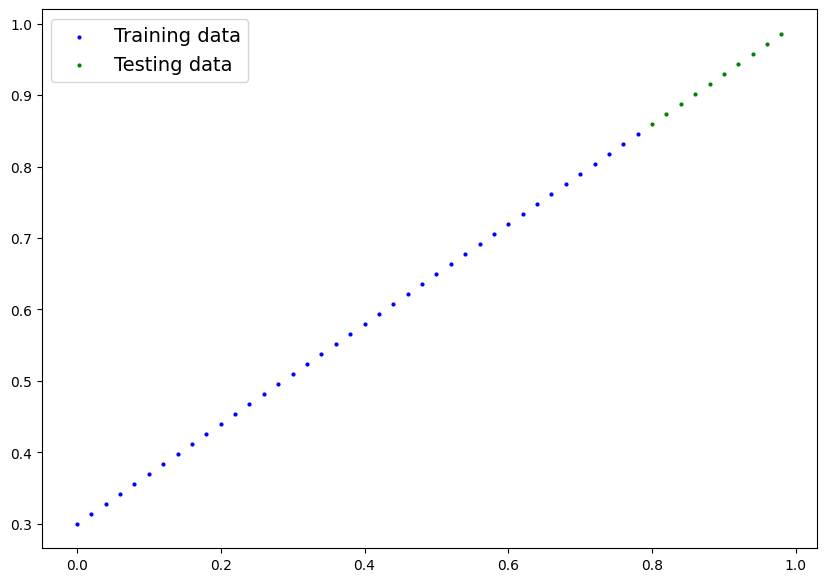

In [86]:
plot_predictions()

##Our first PyTorch model!
This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the
following resource from Real Python:https://realpython.com/python3-object-oriented-programming .


In [87]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float32))
      self.bias = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float32))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


### PyTorch model building essentials
* torch.nn contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module The base class for all neural network modules,
if you subclass it, you should overwrite forward()
* torch.optim this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() -All nn. Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


In [88]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [89]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [91]:
y_pr=model_0(x_test)
y_pr

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [92]:
## this way is more faster
with torch.inference_mode():
  y_predicte=model_0(x_test)

y_predicte

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

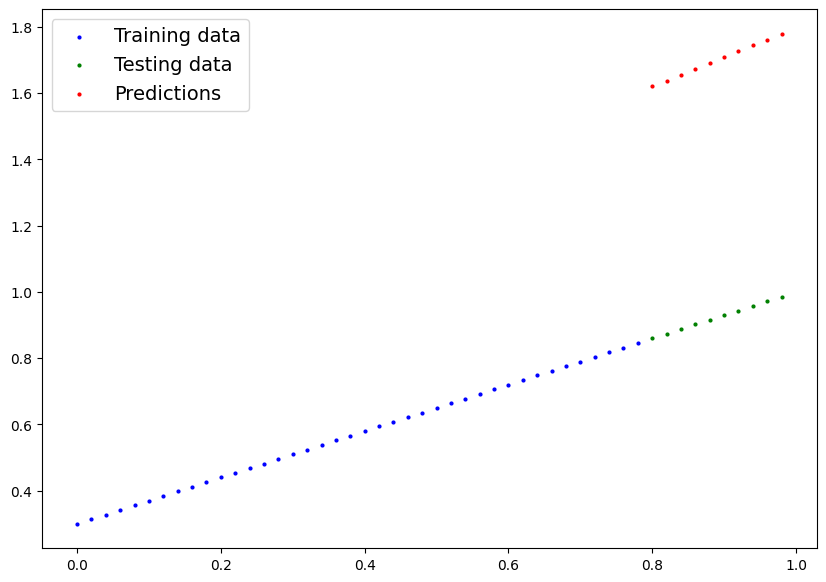

In [93]:
plot_predictions(predictions=y_predicte)

## 3. Train model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known parameters.
Or in other words from a poor representation of the data to a better representation of the data.
One way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [94]:
## choising loss function (L1 is look good her)
loss_func=nn.L1Loss()

##choising optimizer to optimize wghit and bias
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.001)
loss_func,optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

**Q**: Which loss function and optimizer should I use?

**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
For example, for a regression problem (like ours), a loss function of nn. LiLoss() and an optimizer like torch.optim.SGD() will suffice.
But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [95]:
epochs=100

for epoch in range(epochs):
  model_0.train()   # to set some attributes fir trauining

  y_pre=model_0(x_train)

  loss=loss_func(y_pre,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()



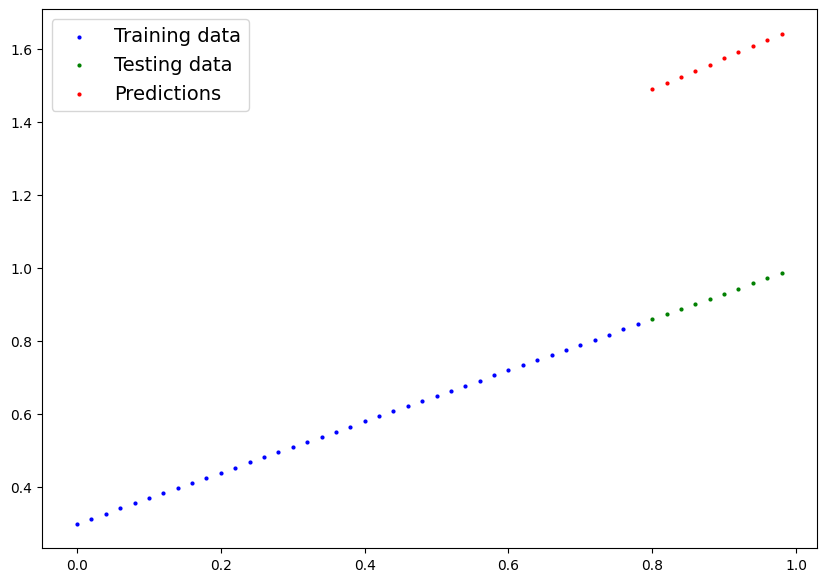

In [96]:
with torch.inference_mode():
  y_predicte=model_0(x_test)

plot_predictions(predictions=y_predicte)



In [97]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8433], requires_grad=True),
 Parameter containing:
 tensor([0.8150], requires_grad=True)]